In [18]:
# Some useful settings for interactive work
%load_ext autoreload
%autoreload 2

%matplotlib widget

import torch
torch.set_float32_matmul_precision('high')

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


In [19]:
# Import the relevant modules
import sousvide.synthesize.rollout_generator as rg
import sousvide.synthesize.observation_generator as og
import sousvide.instruct.train_policy as tp
import sousvide.visualize.plot_synthesize as ps
import sousvide.visualize.plot_synthesize as ps
import sousvide.visualize.plot_learning as pl
import sousvide.flight.deploy_figs as df

In [20]:
cohort = "test0"

data_method = "test0_data"
eval_method = "test0_eval"

scene = "mid_gate"

courses = [
    "traverse"
    ]   

roster = [
    "DRNet",
    "FHNet",
    "MENet"
    ]

deployment = (cohort,courses[0],scene,eval_method)

In [ ]:
# Generate Rollouts
rg.generate_rollout_data(cohort,courses,scene,data_method)

# Review the Rollout Data
ps.plot_rollout_data(cohort)

In [ ]:
# Generate initial observation data sets
og.generate_observation_data(cohort,roster)

======================================================================
Cohort : test0          Network: commNet
======================================================================
----------------------------------------------------------------------
Student: DRNet      | Epochs: 550   | Data Size: 37050.0/1716.0               
Time: 0h 28m 6s     | Train: 0.0031 | Test: 0.0036 | Eval TTE: 0.04
----------------------------------------------------------------------
Student: FHNet      | Epochs: 550   | Data Size: 37050.0/1716.0               
Time: 0h 29m 10s    | Train: 0.0009 | Test: 0.0012 | Eval TTE: 0.05
----------------------------------------------------------------------
Student: MENet      | Epochs: 550   | Data Size: 37050.0/1716.0               
Time: 0h 38m 10s    | Train: 0.0054 | Test: 0.0054 | Eval TTE: 0.04
======================================================================

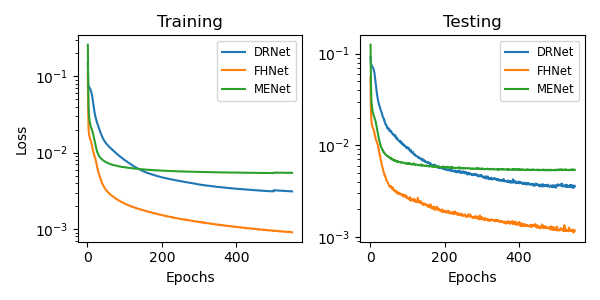

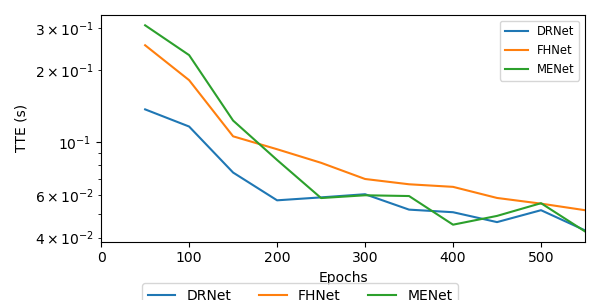

In [22]:
# # # Train the Policy
# # tp.train_roster(cohort,roster,"commNet",50)
# # # tp.train_roster(cohort,roster,"commNet",1200,regen=True)
# # # tp.train_roster(cohort,roster,"commNet",500,deploy,lim_sv=50)
# tp.train_roster(cohort,roster,"commNet",50,deployment=deployment,lim_sv=50)

pl.plot_losses(cohort,roster,"commNet",use_log=True)

Loading latest checkpoint from load_dir

✅ Done loading checkpoint from outputs/mid_gate/splatfacto/2024-10-07_145741/nerfstudio_models/step-000029999.ckpt

Plotting trajectories for expert...

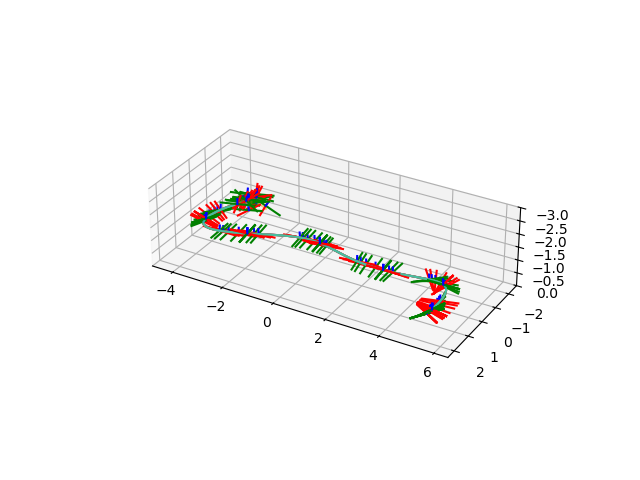

Plotting trajectories for DRNet...

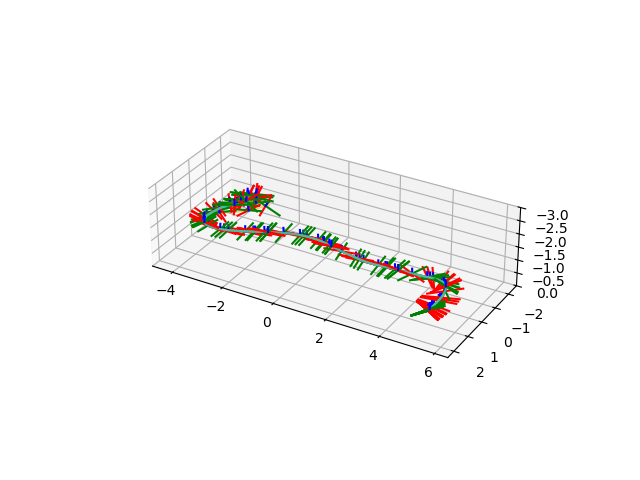

Plotting trajectories for FHNet...

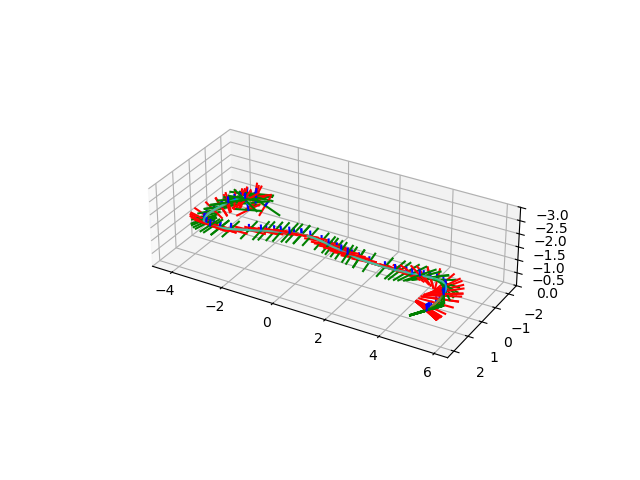

Plotting trajectories for MENet...

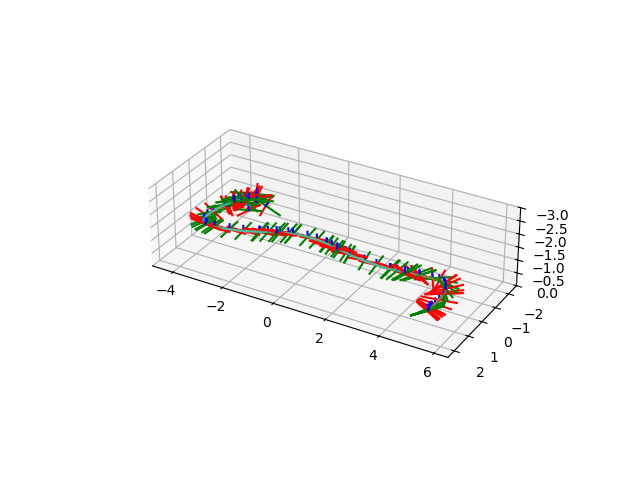

                     Deployment Summary                     
┏━━━━━━━━┳━━━━━━━━━━┳━━━━━━━━━━┳━━━━━━┳━━━━━━━━━┳━━━━━━━━━━┓
┃ Pilot  ┃ TTE Mean ┃ TTE Best ┃  PP  ┃ Hz Mean ┃ Hz Worst ┃
┡━━━━━━━━╇━━━━━━━━━━╇━━━━━━━━━━╇━━━━━━╇━━━━━━━━━╇━━━━━━━━━━┩
│ expert │   0.11   │   0.10   │ 0.98 │ 202.03  │  61.41   │
│ DRNet  │   0.05   │   0.03   │ 0.97 │ 1176.04 │  182.50  │
│ FHNet  │   0.05   │   0.04   │ 0.98 │ 1147.60 │  182.56  │
│ MENet  │   0.05   │   0.03   │ 0.97 │ 808.75  │  168.95  │
└────────┴──────────┴──────────┴──────┴─────────┴──────────┘

In [23]:
# Simulate in FiGS
for course in courses:
    df.deploy_roster(cohort,deployment,roster,mode="visualize")
    pl.plot_deployments(cohort,course,roster,plot_show=True)